### Transformations 

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plotter
from typing import List
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from scipy.stats import skewnorm, zscore, boxcox


### Data generation

In [33]:
def generate_skewed_data_right(size=1000, skewness=5):
    # Sağ tarafa çarpık veri oluşturma (pozitif çarpıklık)
    data = skewnorm.rvs(a=skewness, size=size)
    return data

def generate_skewed_data_left(size=1000, skewness=-5):
    # Sol tarafa çarpık veri oluşturma (negatif çarpıklık)
    data = skewnorm.rvs(a=skewness, size=size)
    return data

def generate_extreme_skewed_data_right(size=1000, skewness=60):
    # Aşırı sağ tarafa çarpık veri oluşturma (çok pozitif çarpıklık)
    data = skewnorm.rvs(a=skewness, size=size)
    return data


In [34]:
def plot_data(data, title):
    plt.figure(figsize=(10, 5))
    plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [35]:
right_skewed_data = generate_skewed_data_right()
left_skewed_data = generate_skewed_data_left()
extreme_skewed_data = generate_extreme_skewed_data_right()


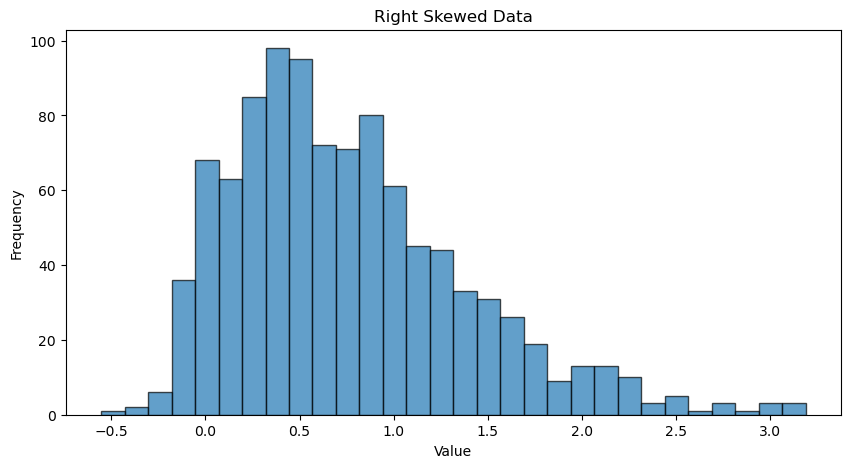

In [36]:
plot_data(right_skewed_data, 'Right Skewed Data')

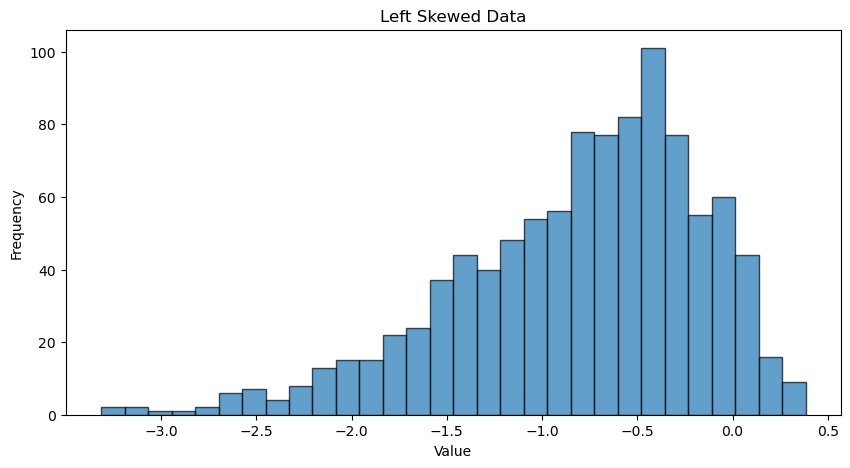

In [37]:
plot_data(left_skewed_data, 'Left Skewed Data')

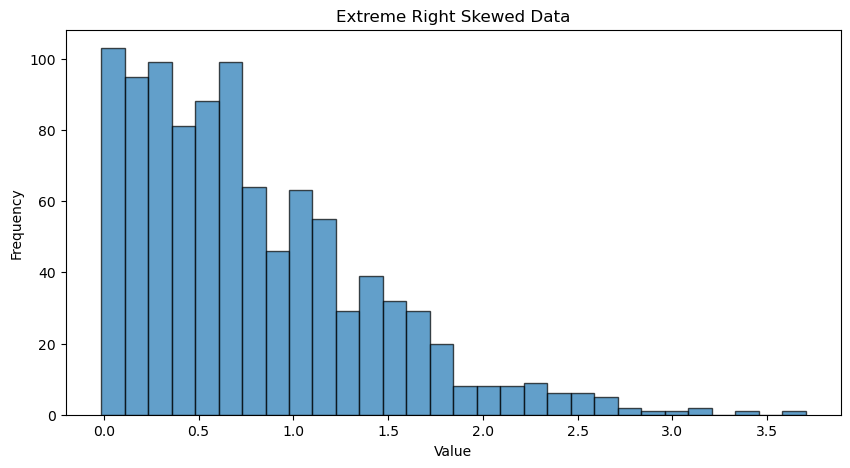

In [38]:
plot_data(extreme_skewed_data, 'Extreme Right Skewed Data')

In [49]:
df = pd.DataFrame({
    'Right_Skewed': right_skewed_data,
    'Left_Skewed': left_skewed_data,
    'Extreme_Right_Skewed': extreme_skewed_data
})
df

,Right_Skewed,Left_Skewed,Extreme_Right_Skewed
0,1.052175,-0.769163,2.181153
1,0.058873,-1.128029,1.027848
2,0.669873,-1.694173,0.354260
3,0.628037,-0.753890,0.406356
4,0.871132,-1.491949,0.362137
...,...,...,...
995,0.681999,-1.918959,0.989468
996,0.253343,-1.025062,0.550722
997,1.133004,-0.173253,1.431416
998,0.233797,-1.019595,0.640874


#### Functions 

In [3]:
def standardize_dataset(df: DataFrame):
    scaler = StandardScaler().fit(df)
    df2 = DataFrame(data=scaler.transform(df), columns=df.columns)
    return df2


In [4]:
def normalize_dataset(df: DataFrame,
                      all_pos=False,
                      min_val: float = 0.000001,
                      exclude: List[str] = []):
    df2 = df.copy()
    for c in df.columns:
        if c not in exclude:
            if all_pos:
                df2[c] = min_val + (df[c] - df[c].min()) / (df[c].max() - df[c].min() - min_val)
            else:
                df2[c] = (df[c] - df[c].min()) / (df[c].max() - df[c].min())
    return df2

In [5]:
def box_cox(data,
            normalize=False,
            standardize=False):
    fitter = PowerTransformer(method="box-cox",
                              standardize=standardize)
    dt = fitter.fit_transform(data)
    if normalize:
        dt = (dt - dt.min()) / (dt.max() - dt.min())
    return dt

In [6]:
def yeo_johnson(data,
                normalize=False,
                standardize=False):
    fitter = PowerTransformer(method="yeo-johnson",
                              standardize=standardize)
    dt = fitter.fit_transform(data)
    if normalize:
        dt = (dt - dt.min()) / (dt.max() - dt.min())
    return dt

In [57]:
def plot_transformation(original, transformed, title):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.hist(original, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Original {title}')

    plt.subplot(1, 2, 2)
    plt.hist(transformed, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Transformed {title}')

    plt.show()


### Applications ### 

In [71]:
# Log Dönüşümü
df['Right_Skewed_log'] = np.log(df['Right_Skewed'] - df['Right_Skewed'].min() + 1)
df['Left_Skewed_log'] = np.log(df['Left_Skewed'] - df['Left_Skewed'].min() + 1)
df['Extreme_Right_Skewed_log'] = np.log(df['Extreme_Right_Skewed'] - df['Extreme_Right_Skewed'].min() + 1)

# Kareköklü Dönüşüm
df['Right_Skewed_sqrt'] = np.sqrt(df['Right_Skewed'] - df['Right_Skewed'].min() + 1)
df['Left_Skewed_sqrt'] = np.sqrt(df['Left_Skewed'] - df['Left_Skewed'].min() + 1)
df['Extreme_Right_Skewed_sqrt'] = np.sqrt(df['Extreme_Right_Skewed'] - df['Extreme_Right_Skewed'].min() + 1)

# Box-Cox Dönüşümü (Verinin pozitif olması gerekiyor)
df['Right_Skewed_boxcox'], _ = boxcox(df['Right_Skewed'] - df['Right_Skewed'].min() + 1)
df['Left_Skewed_boxcox'], _ = boxcox(df['Left_Skewed'] - df['Left_Skewed'].min() + 1)
df['Extreme_Right_Skewed_boxcox'], _ = boxcox(df['Extreme_Right_Skewed'] - df['Extreme_Right_Skewed'].min() + 1)

# 1/N Dönüşümü (ters)
df['Right_Skewed_reciprocal'] = 1 / (df['Right_Skewed'] - df['Right_Skewed'].min() + 1)
df['Left_Skewed_reciprocal'] = 1 / (df['Left_Skewed'] - df['Left_Skewed'].min() + 1)
df['Extreme_Right_Skewed_reciprocal'] = 1 / (df['Extreme_Right_Skewed'] - df['Extreme_Right_Skewed'].min() + 1)

# Z-Score Standardizasyonu
df['Right_Skewed_zscore'] = zscore(df['Right_Skewed'])
df['Left_Skewed_zscore'] = zscore(df['Left_Skewed'])
df['Extreme_Right_Skewed_zscore'] = zscore(df['Extreme_Right_Skewed'])

# Min-Max Normalizasyonu
scaler = MinMaxScaler()
df['Right_Skewed_minmax'] = scaler.fit_transform(df[['Right_Skewed']])
df['Left_Skewed_minmax'] = scaler.fit_transform(df[['Left_Skewed']])
df['Extreme_Right_Skewed_minmax'] = scaler.fit_transform(df[['Extreme_Right_Skewed']])




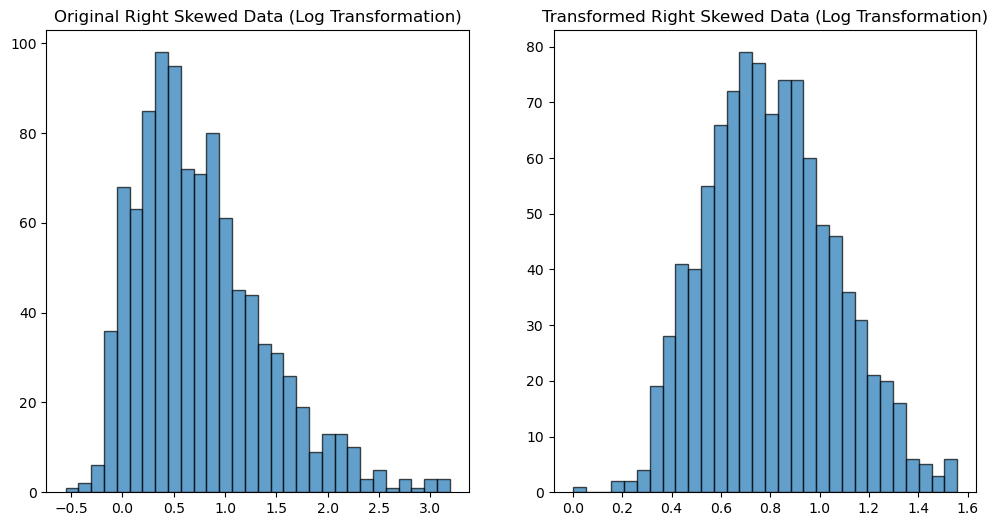

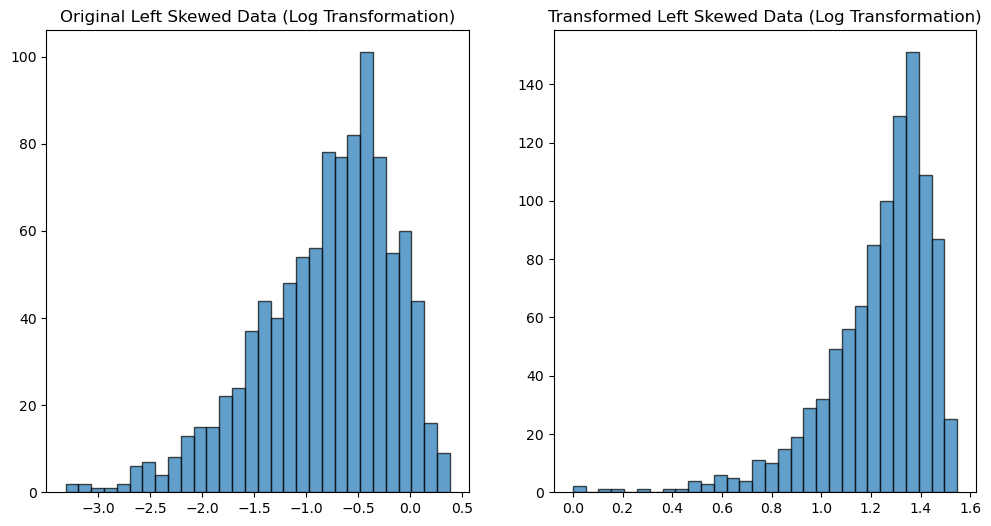

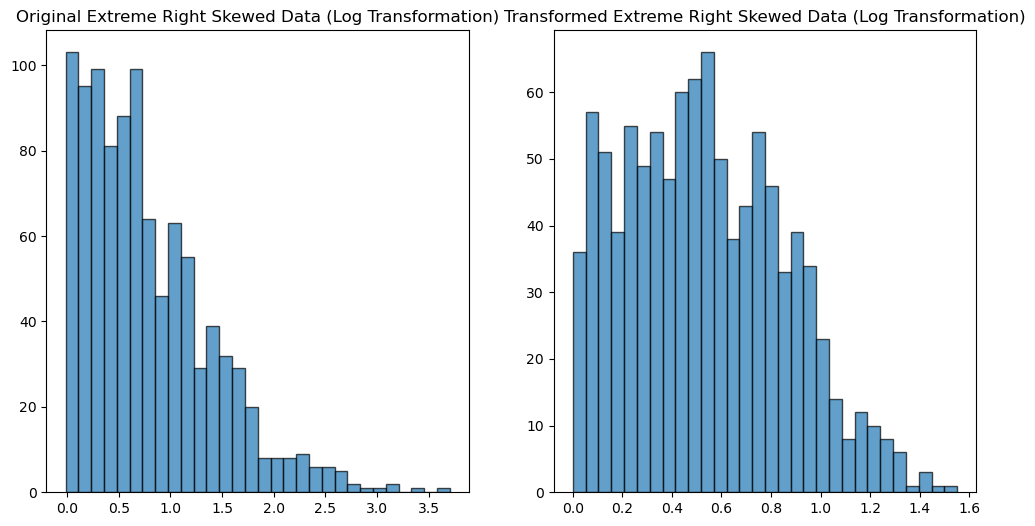

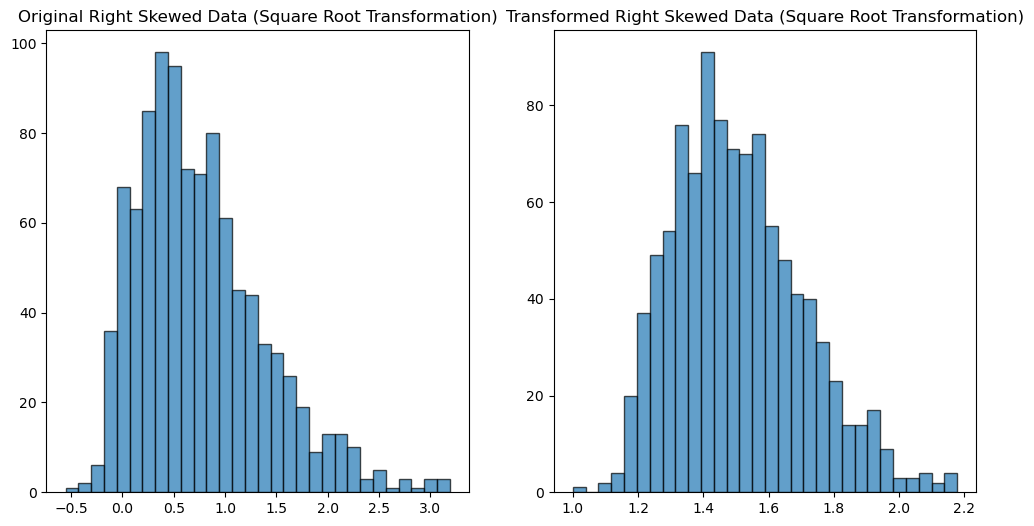

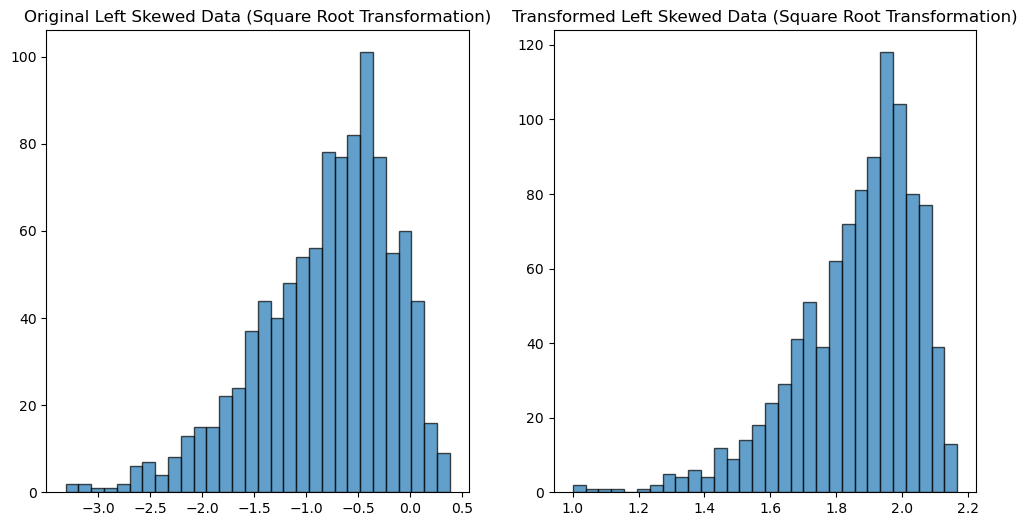

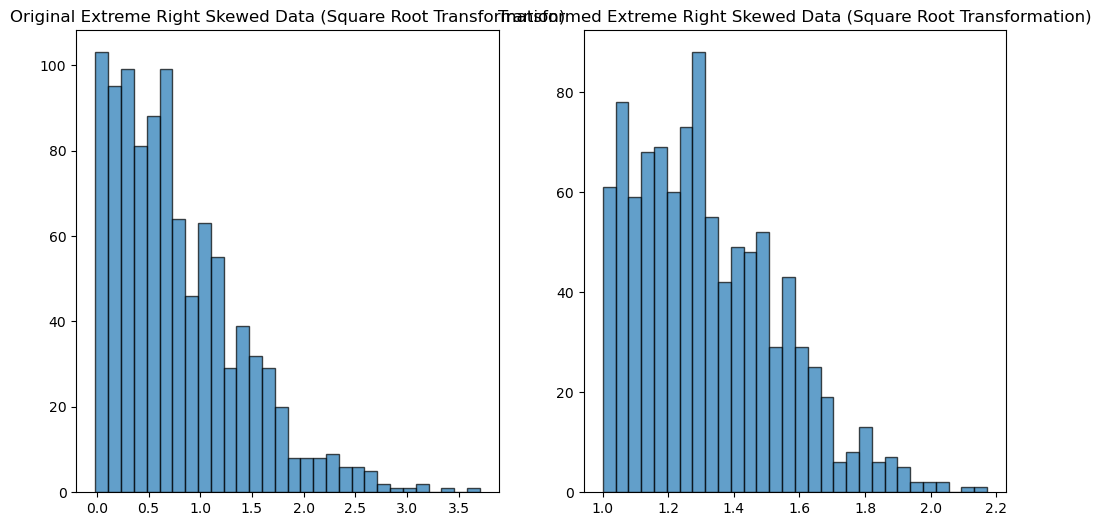

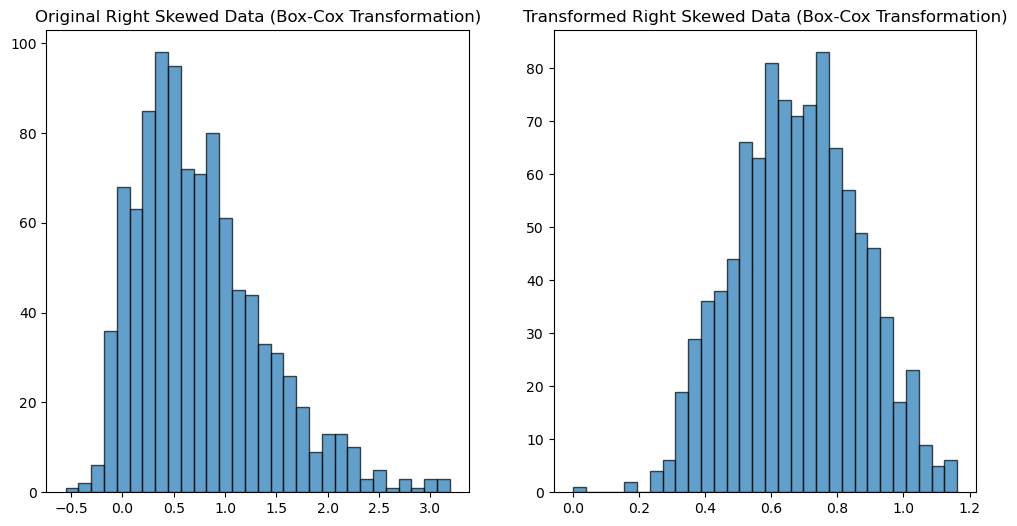

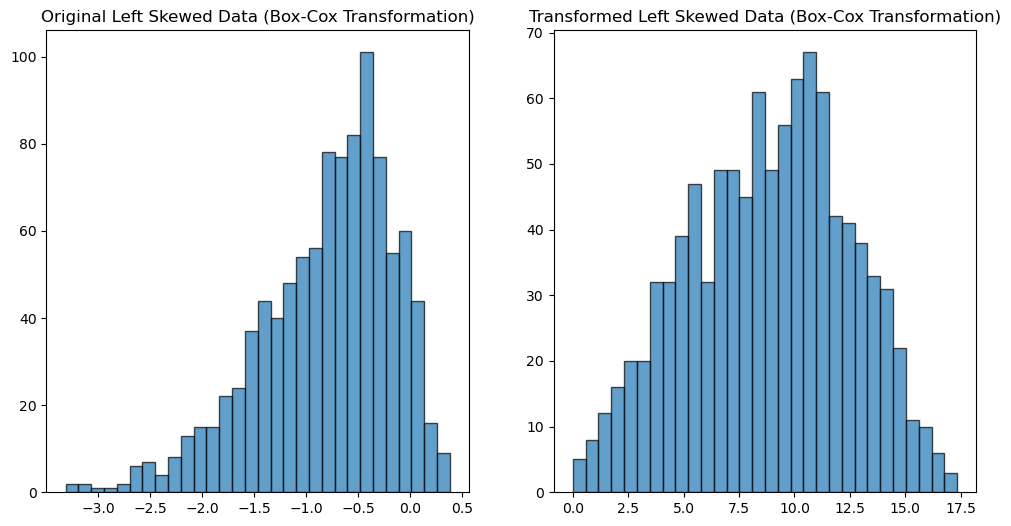

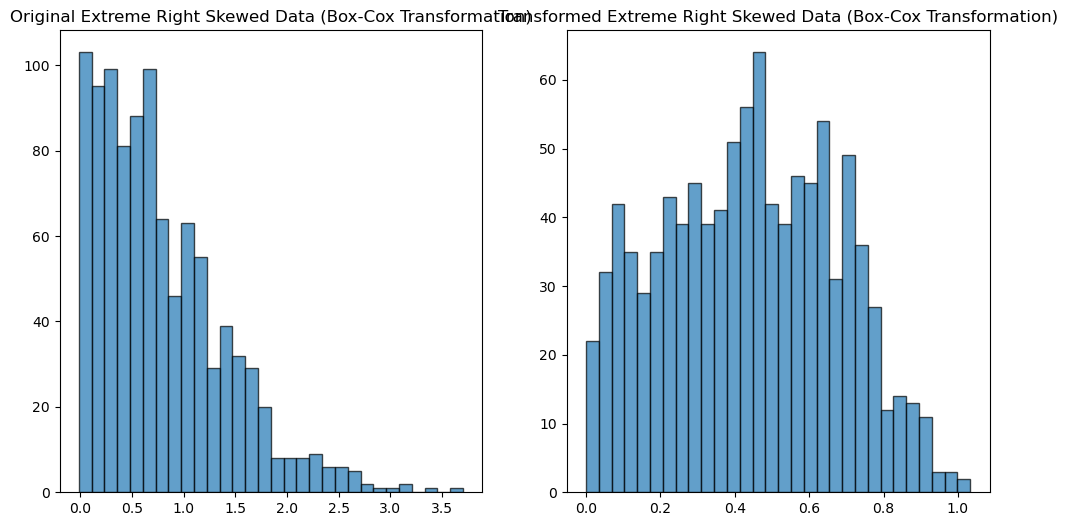

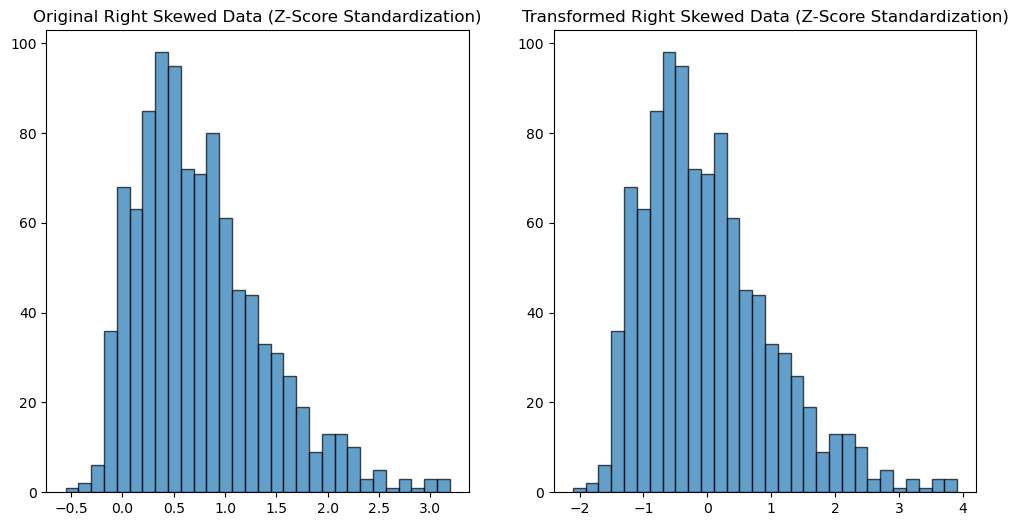

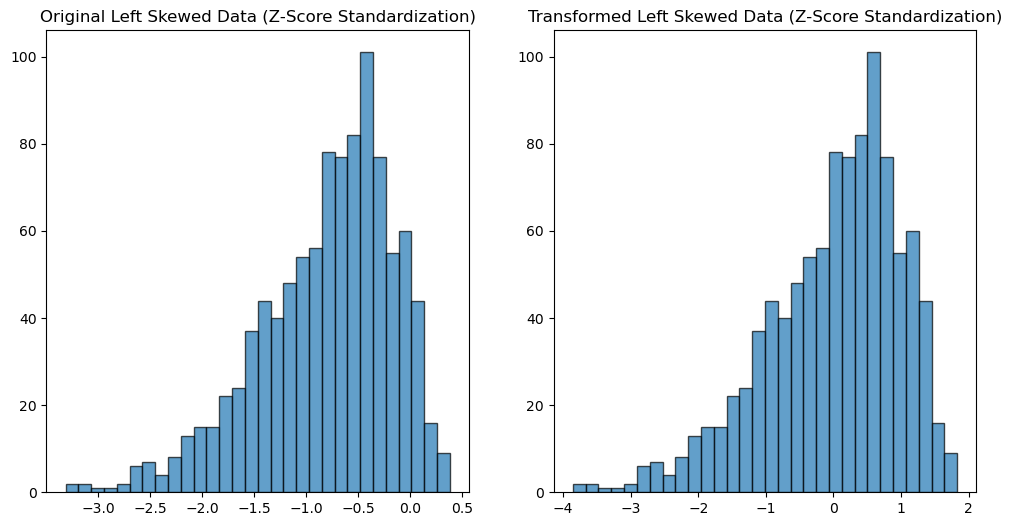

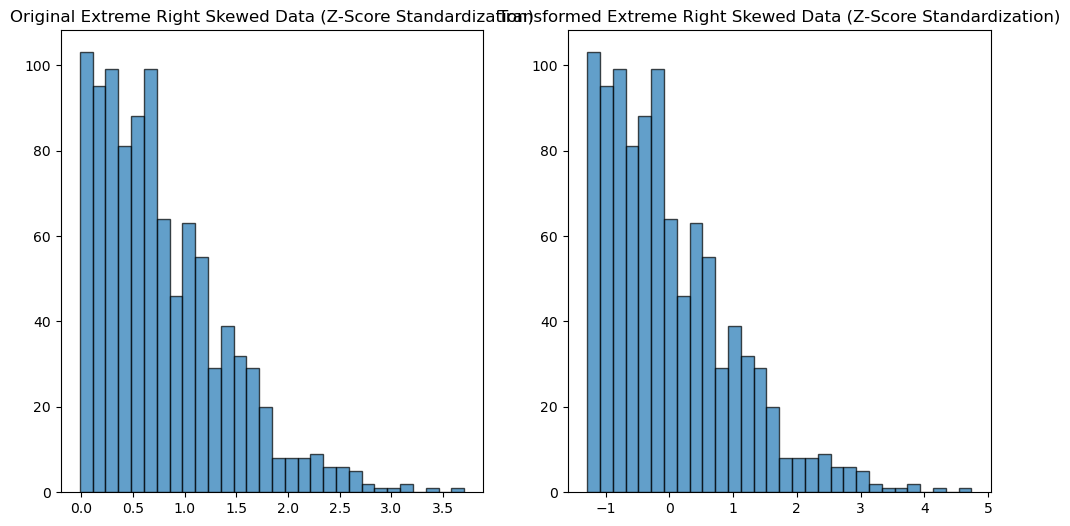

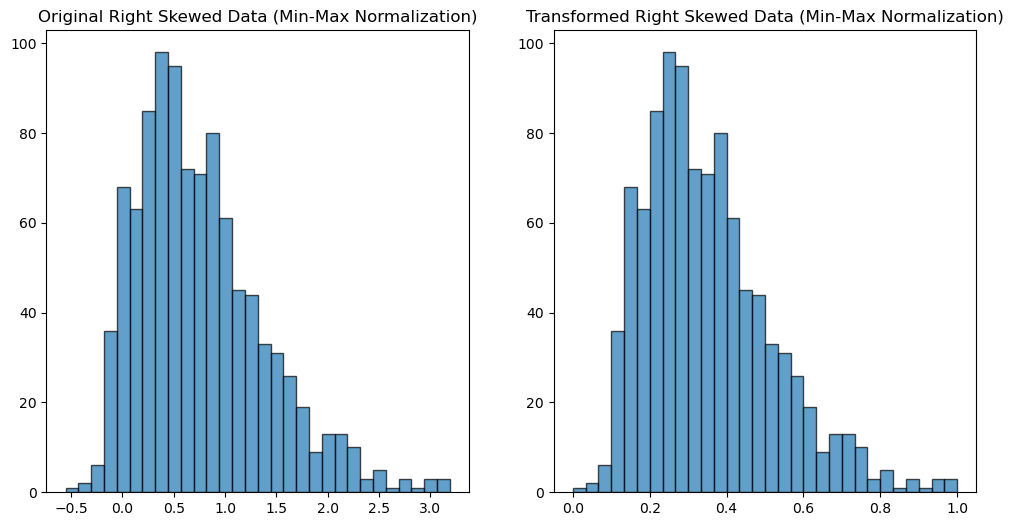

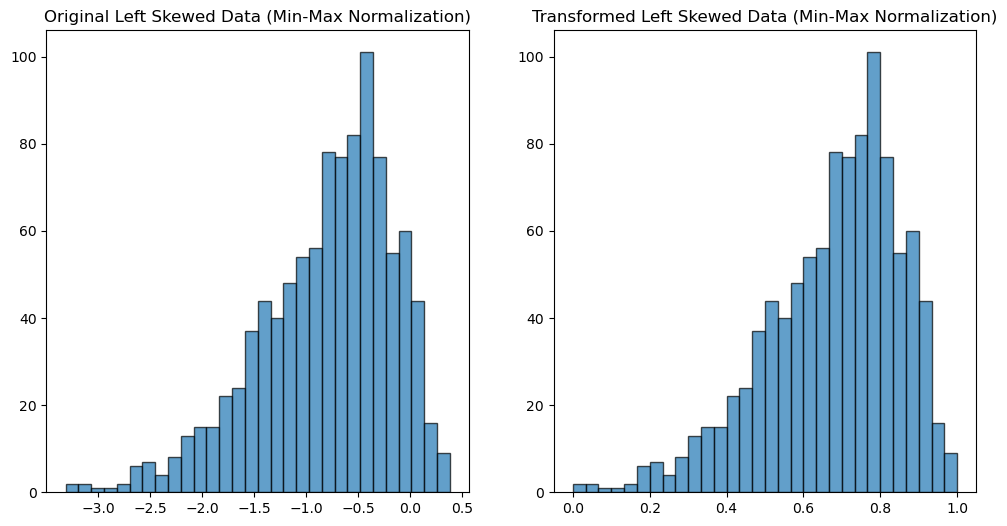

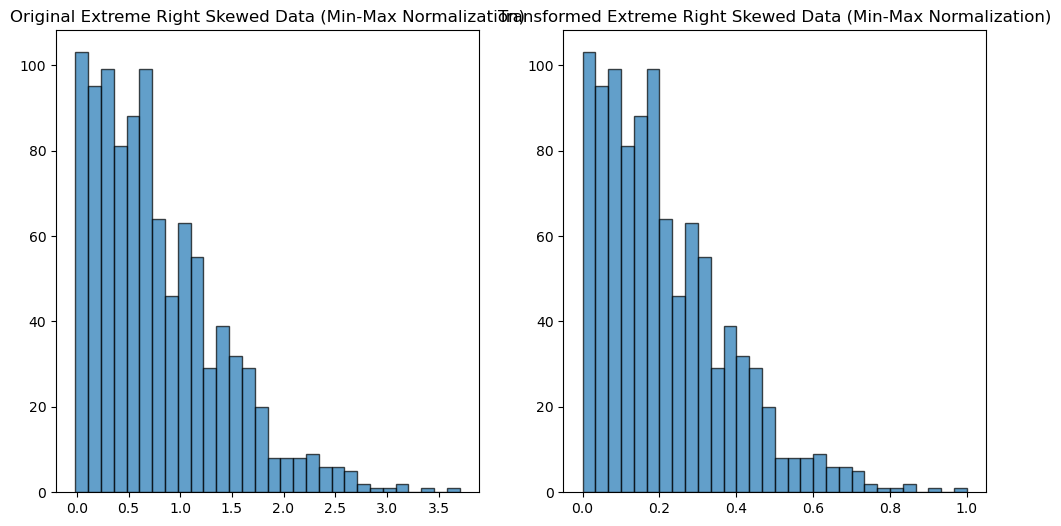

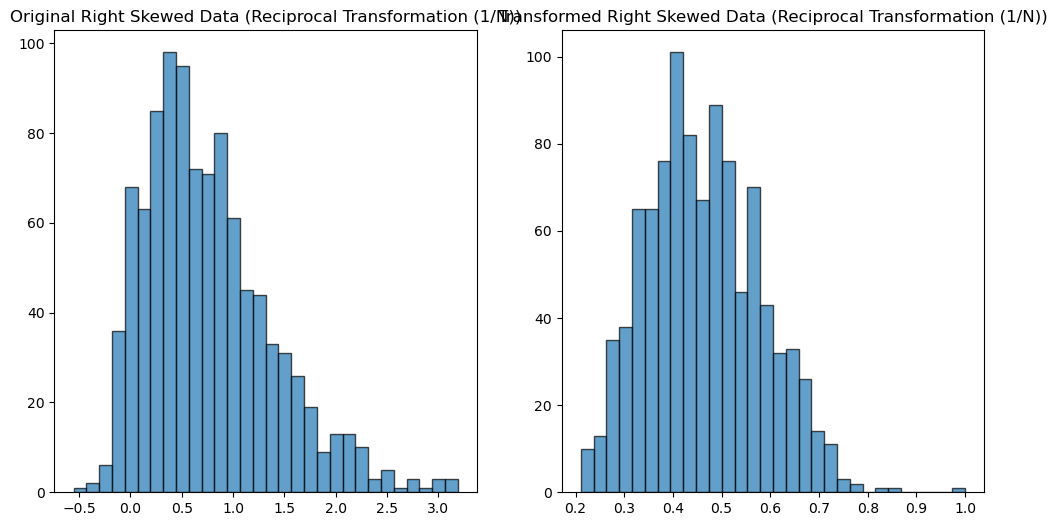

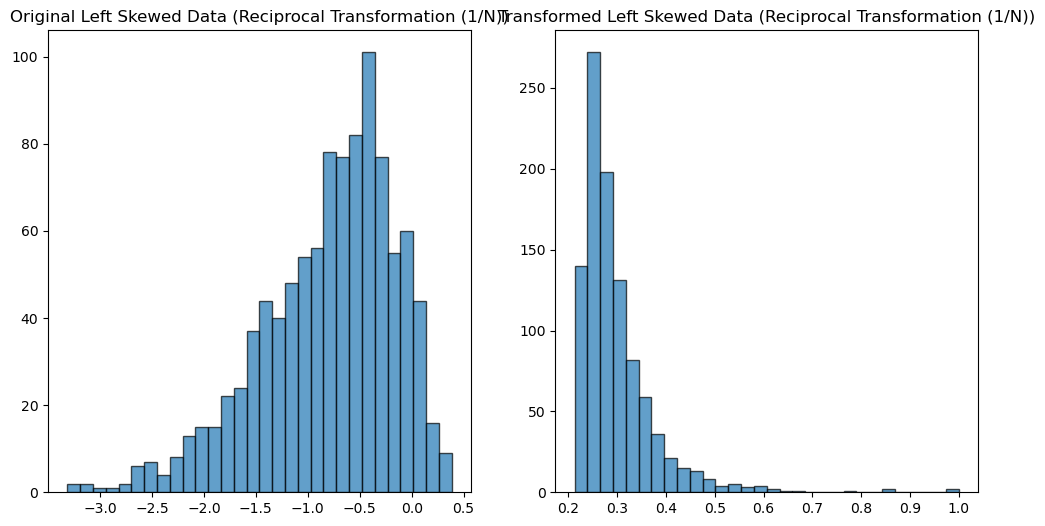

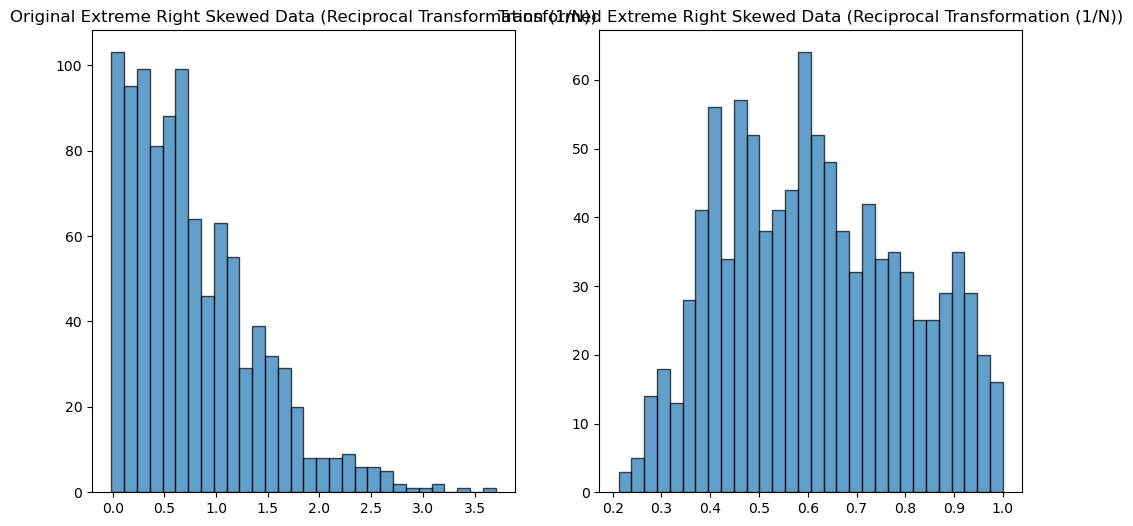

In [73]:
# Dönüşümleri görselleştirme
transformations = {
    'log': 'Log Transformation',
    'sqrt': 'Square Root Transformation',
    'boxcox': 'Box-Cox Transformation',
    'zscore': 'Z-Score Standardization',
    'minmax': 'Min-Max Normalization',
    'reciprocal': 'Reciprocal Transformation (1/N)'
}

for transformation, title in transformations.items():
    plot_transformation(df['Right_Skewed'], df[f'Right_Skewed_{transformation}'], f'Right Skewed Data ({title})')
    plot_transformation(df['Left_Skewed'], df[f'Left_Skewed_{transformation}'], f'Left Skewed Data ({title})')
    plot_transformation(df['Extreme_Right_Skewed'], df[f'Extreme_Right_Skewed_{transformation}'], f'Extreme Right Skewed Data ({title})')
